# Metoda celor mai apropiați k-vecini


Pagina github: https://github.com/artificial-intelligence-ml-cti/ml_cti/blob/main/laborator3/

### Importuri necesare

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

### Dezarhivare 

In [ ]:
! rm -rf data*
! wget https://github.com/artificial-intelligence-ml-cti/ml_cti/raw/main/laborator3/data.zip
! unzip "data.zip"

! echo "***\n Fisierele sunt: "
! ls data/
! echo "****\n Calea catre directorul cu date este: "
! readlink -f data/


--2021-11-02 06:22:01--  https://github.com/artificial-intelligence-ml-cti/ml_cti/raw/main/laborator3/data.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/artificial-intelligence-ml-cti/ml_cti/main/laborator3/data.zip [following]
--2021-11-02 06:22:02--  https://raw.githubusercontent.com/artificial-intelligence-ml-cti/ml_cti/main/laborator3/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 629644 (615K) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>] 614.89K  --.-KB/s    in 0.006s  

2021-11-02 06:22:02 (101 MB/s) - ‘data.zip’ saved [629644/6296

### Calea catre date

In [ ]:
data_path = "/content/data"

### Incarcare date train

In [ ]:
# variabile pentru calea catre fisier
train_path = os.path.join(data_path, "train_images.txt")
tr_labels_path = os.path.join(data_path, "train_labels.txt")
test_path = os.path.join(data_path, "test_images.txt")
ts_labels_path = os.path.join(data_path, "test_labels.txt")

# variabile cu fisierele incarcate
train_images = np.loadtxt(train_path, 'uint8')
train_labels = np.loadtxt(tr_labels_path, 'int8')
test_images = np.loadtxt(test_path, 'uint8')
test_labels = np.loadtxt(ts_labels_path, 'int8')

Imaginile sunt reprezentate sub forma de array liniar de 784 de elemente
784 = 28x28 pixeli. Citirea se face in format uint8, adica fiecare pixel gray-scale este reprezentat pe maxim 8 biti 

- 0   reprezinta culoarea negru
- 255 reprezinta alb


In [ ]:
print(train_images.shape)
print(train_images.ndim)
print(type(train_images[0,0]))
print(train_images.size)
print(train_images.nbytes)

(1000, 784)
2
<class 'numpy.uint8'>
784000
784000


In [ ]:
# exemplu de operatii pe uint8
x = np.array([1, 2, 3], dtype=np.uint8)
y = np.array([10, 2, 255], dtype=np.uint8)
print(x-y)
print((x-y).dtype)
print((x-y)**2)
print(((x-y)**2).dtype)
print(x/y)
print((x/y).dtype)
print(x+y)
print((x+y).dtype)



[247   0   4]
uint8
[81  0 16]
uint8
[0.1        1.         0.01176471]
float64
[11  4  2]
uint8


### Plotare date

In [ ]:
def plot_some_images(images, labels, how_many=10):
    '''Plot the first 100 training images with their labels in a 10 x 10 subplot
    '''
    max_many = np.min([how_many*how_many, len(labels)])
    plt.figure(figsize=(5,5))
    for i in range(max_many):
        plt.subplot(how_many, how_many, i+1)
        plt.axis('off')
        imagine = np.reshape(images[i, :], (28, 28))
        plt.imshow(imagine, cmap="gray")
    plt.show()
    labels_how_many = labels[:how_many*how_many]
    try:
      matrice_lables = np.reshape(labels_how_many, (how_many, how_many))
    except:
      matrice_lables = labels_how_many
    print(matrice_lables)

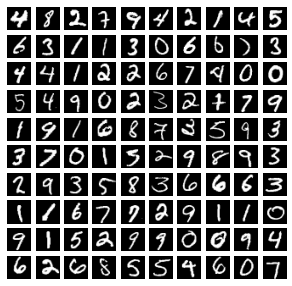

[[4 8 2 7 9 4 2 1 4 5]
 [6 3 1 1 3 0 6 6 7 3]
 [4 4 1 2 2 6 7 4 0 0]
 [5 4 9 0 2 3 2 7 7 9]
 [1 9 1 6 8 7 3 5 9 3]
 [3 7 0 1 3 2 9 8 9 3]
 [2 9 3 5 8 3 6 6 6 3]
 [1 1 6 7 7 2 9 1 1 0]
 [9 1 5 2 9 9 0 0 9 4]
 [6 2 6 8 5 5 4 6 0 7]]


In [ ]:
plot_some_images(train_images, train_labels)

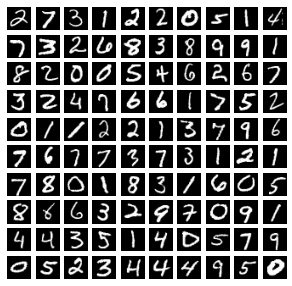

[[2 7 3 1 2 2 0 5 1 4]
 [7 3 2 6 8 3 8 9 9 1]
 [8 2 0 0 5 4 6 2 6 7]
 [3 2 4 7 6 6 1 7 5 2]
 [0 1 1 2 2 1 3 7 9 6]
 [7 6 7 7 3 7 3 1 2 1]
 [7 8 0 1 8 3 1 6 0 5]
 [8 6 6 3 2 9 7 0 9 1]
 [4 4 3 5 1 4 0 5 7 9]
 [0 5 2 3 4 4 4 9 5 0]]


In [ ]:
plot_some_images(test_images, test_labels)

## Exercitii

In [ ]:
def plot_one_vector_image(image):
  plt.figure(figsize=(5,5))
  imagine = np.reshape(image, (28, 28))
  plt.imshow(imagine, cmap="gray")
  plt.show()




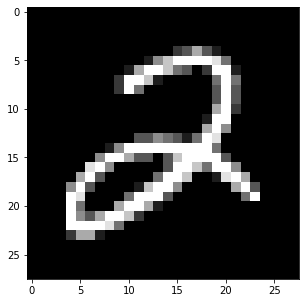

In [ ]:
plot_one_vector_image(test_images[0, :])

In [ ]:
def dist_euclid(vector, matrice):
  #print(vector.dtype)
  #print(matrice.dtype)
  vector = vector.astype(np.float32)
  matrice = matrice.astype(np.float32)
  # todo:


In [ ]:
def dist_l1(vector, matrice):
  # todo:
  pass

uint8
uint8


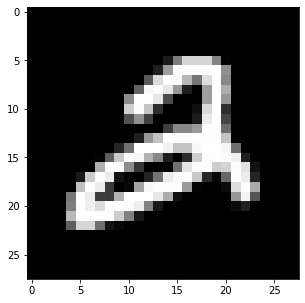

In [ ]:
distante = dist_euclid(test_images[0, :], train_images)
indicii_sortati_dupa_distanta = np.argsort(distante)
plot_one_vector_image(train_images[indicii_sortati_dupa_distanta[0]])



In [ ]:
K = 5
primii_k_indici = indicii_sortati_dupa_distanta[:K]

unq, aparitii =  np.unique(train_labels[primii_k_indici], return_counts=True)
print(unq, ' ', aparitii )

nr_de_aparitii = np.bincount(train_labels[primii_k_indici])
#indicele din vectorul de frecvente cu pozitia corespunzatoare valorii celei mai mari
clasa_cu_cele_mai_multe_aparitii = np.argmax(nr_de_aparitii)
clasa_cu_cele_mai_multe_aparitii


[2 4]   [4 1]


2